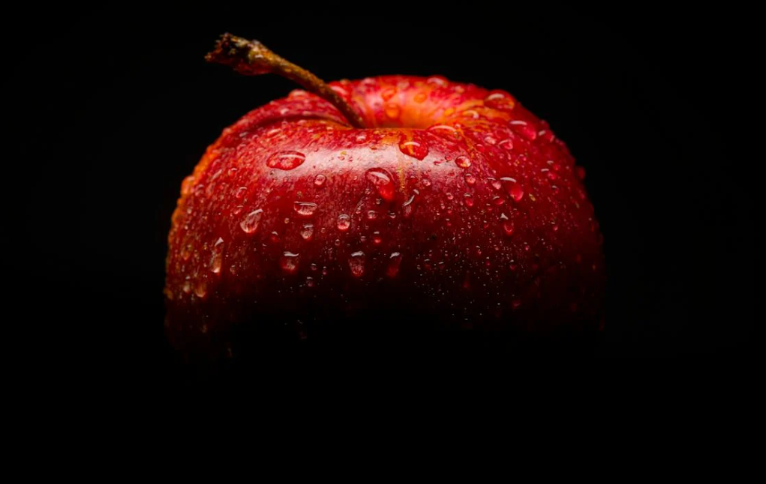

## Hi everyone, my name is Emran and I live in Jordan. I'm excited to share a project I did on machine learning, which lets computers learn from data, kind of like how we learn from experience.

## For this project, I wanted to tackle a challenge close to home: apple quality. We all love apples, but sometimes it's tough to tell if they're perfectly ripe and delicious, or if they have any small marks.

### Apple Quality Prediction Project

##### In this project, we aim to predict the quality of apples using machine learning algorithms. Apples are one of the most consumed fruits worldwide, and their quality plays a crucial role in consumer satisfaction and marketability.

##### The quality of apples can be affected by various factors such as size, color, texture, and presence of defects. By analyzing these attributes, we can develop predictive models to classify apples into different quality categories, which can help farmers and distributors in sorting and grading their produce.

##### We will explore a dataset containing information about different attributes of apples and their corresponding quality ratings. Our goal is to build machine learning models that can accurately predict apple quality based on these attributes.

**Let's get started!🍎**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


* **A_id:** Unique identifier for each fruit
* **Size:** Size of the fruit
* **Weight:** Weight of the fruit
* **Sweetness:** Degree of sweetness of the fruit
* **Crunchiness:** Texture indicating the crunchiness of the fruit
* **Juiciness:** Level of juiciness of the fruit
* **Ripeness:** Stage of ripeness of the fruit
* **Acidity:** Acidity level of the fruit
* **Quality:** Overall quality of the fruit

# **IMPORTING LIBRARIES** 🍎 # 

In [2]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## After downloading the data, I used special tools like pandas to organize it and libraries like matplotlib to create charts to understand the information better. Then, I used other tools to train a computer model to identify good and bad apples based on their features.

In [3]:
df=pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## I used pandas to grab the data from a file and put it in a table called "df" for easy viewing. We can then look at the first few rows to see what kind of information we have about the apples.

In [4]:
df.tail()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## this code lets us see the last few entries in our apple data table.

In [5]:
last_row_index = len(df) - 1

# Drop the last row by index
df = df.drop(last_row_index)

## I noticed the last row in our data table seemed empty, like it had no information. So, I used a tool called .drop to remove that empty row and keep only the rows with actual apple data.

In [6]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

##  isnull helps us check for missing information in our apple data table, like empty spots where some information might be missing.

* **All columns in the dataset have zero missing values.**

In [7]:
print('Shape of Dataset:', df.shape)

Shape of Dataset: (4000, 9)


## by Using .shape, we found out our data table is like a grid with 4000 rows and 9 columns.

In [8]:
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### * Class is pandas - DataFrame 
### * as we said before we have 4000 rows and 9 columns 
### * the Data type is float for most of the columns 

In [10]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [11]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

df['Quality'] = label_encoder.fit_transform(df['Quality'])

## Remember the "Quality" column in our data table? It had text labels like "good" or "bad" to describe the apples. But computers work better with numbers. So, I used a tool called LabelEncoder to convert those text labels into numerical codes, like "good" becoming 1 and "bad" becoming 0. This makes it easier for our machine learning model to understand and work with the data.

In [12]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


In [13]:
df.drop(columns=['A_id'], inplace=True)
df.head(1)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.34633,-1.012009,1.8449,0.32984,-0.491590483,1


## I cleaned up the data by removing an extra column ("A_id") that wasn't needed for understanding apple quality.

 * **Visualizing relationships between variables in a dataset can be done by creating scatter plots for each variable pair. These plots are arranged in a matrix layout for easy comparison. Histograms along the diagonal show variable distributions. This method offers a comprehensive view of multivariate relationships without using specific functions like pairplot()**

[]

<Figure size 1500x1000 with 0 Axes>

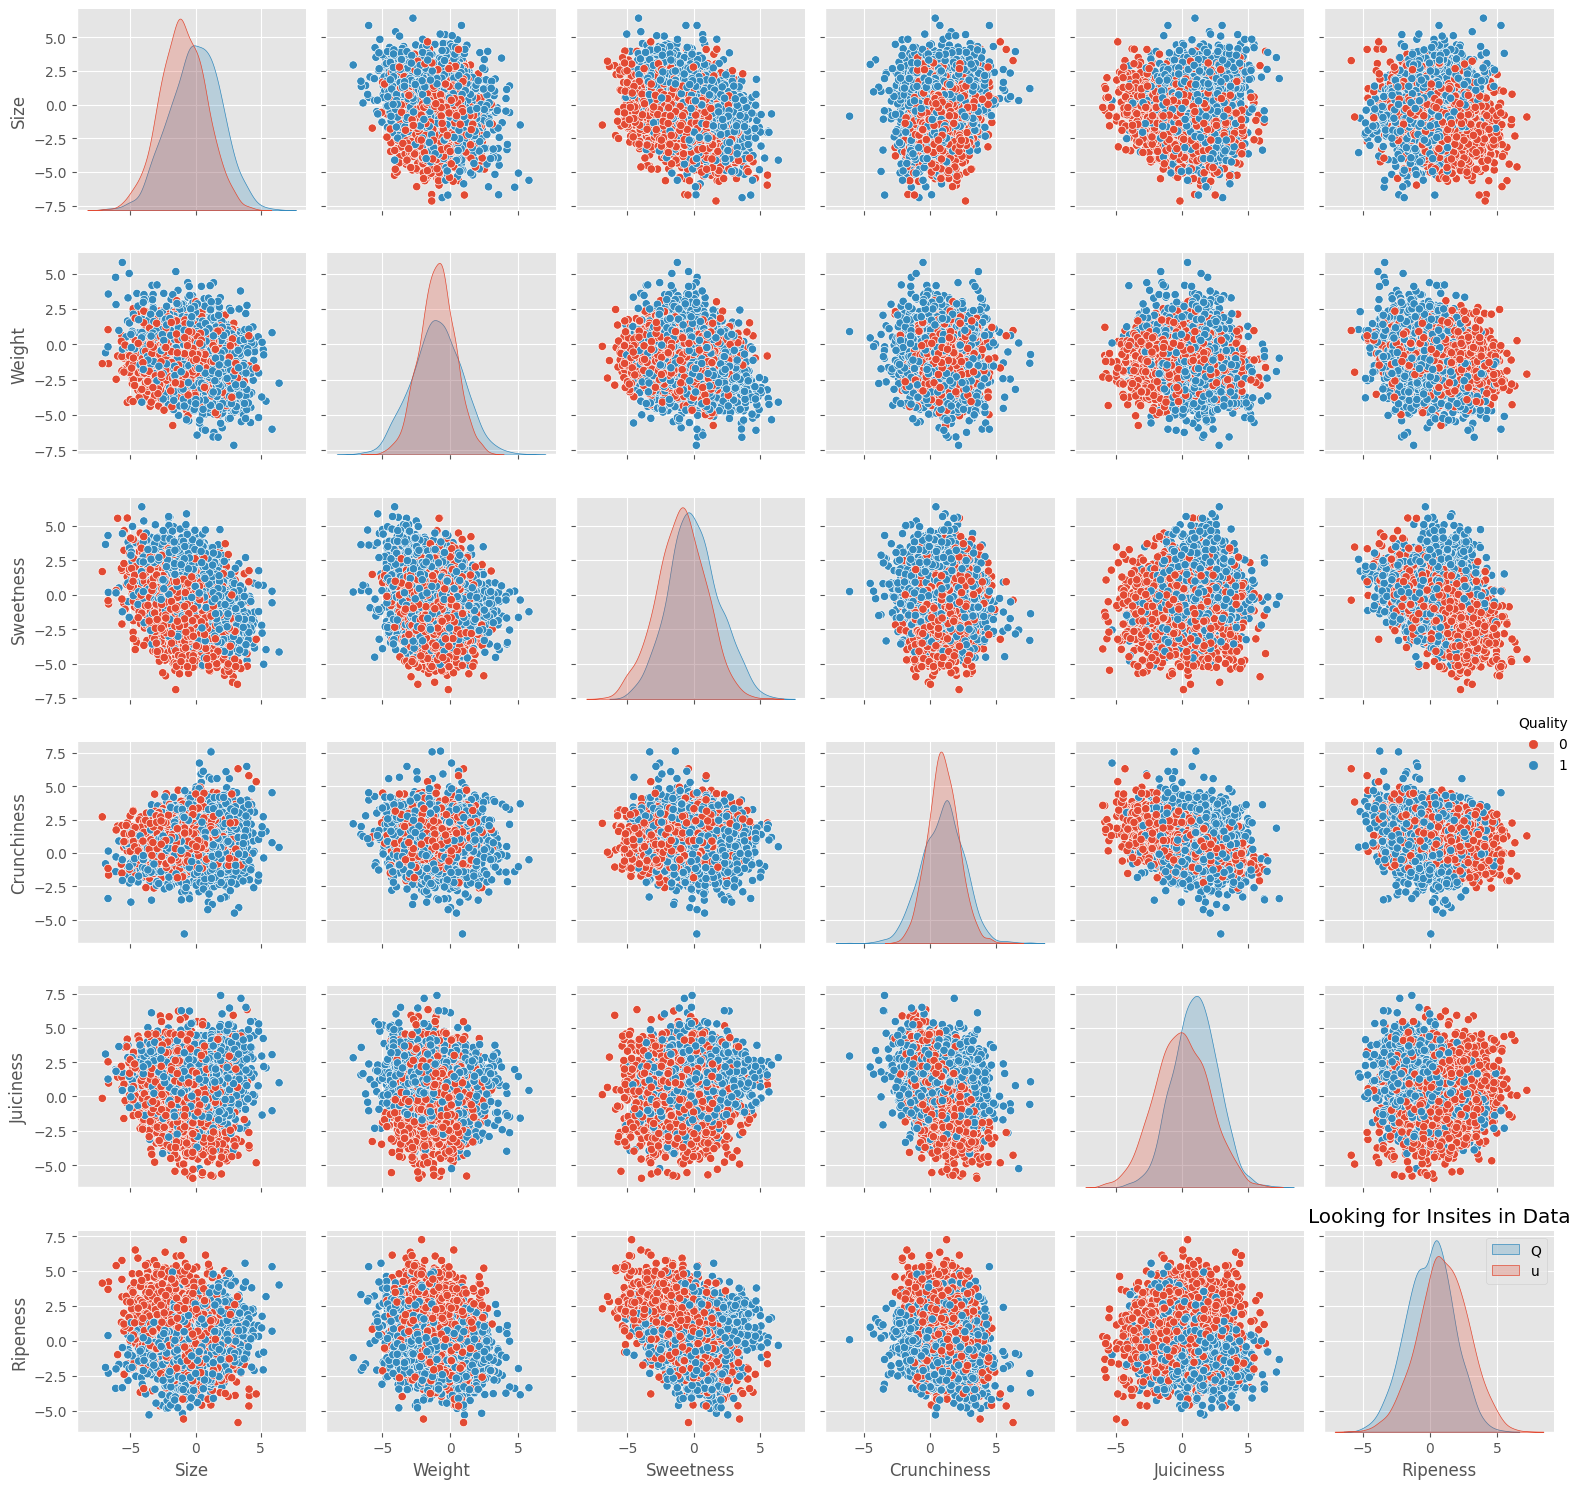

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="Quality")
plt.title("Looking for Insites in Data")
plt.legend("Quality")
plt.tight_layout()
plt.plot()

## To get a quick overview of how all the features in our data relate to each other, I used a tool called .pairplot. 

* **To assess linearity, plot distributions and check skewness using kernel density estimates (kde).** 

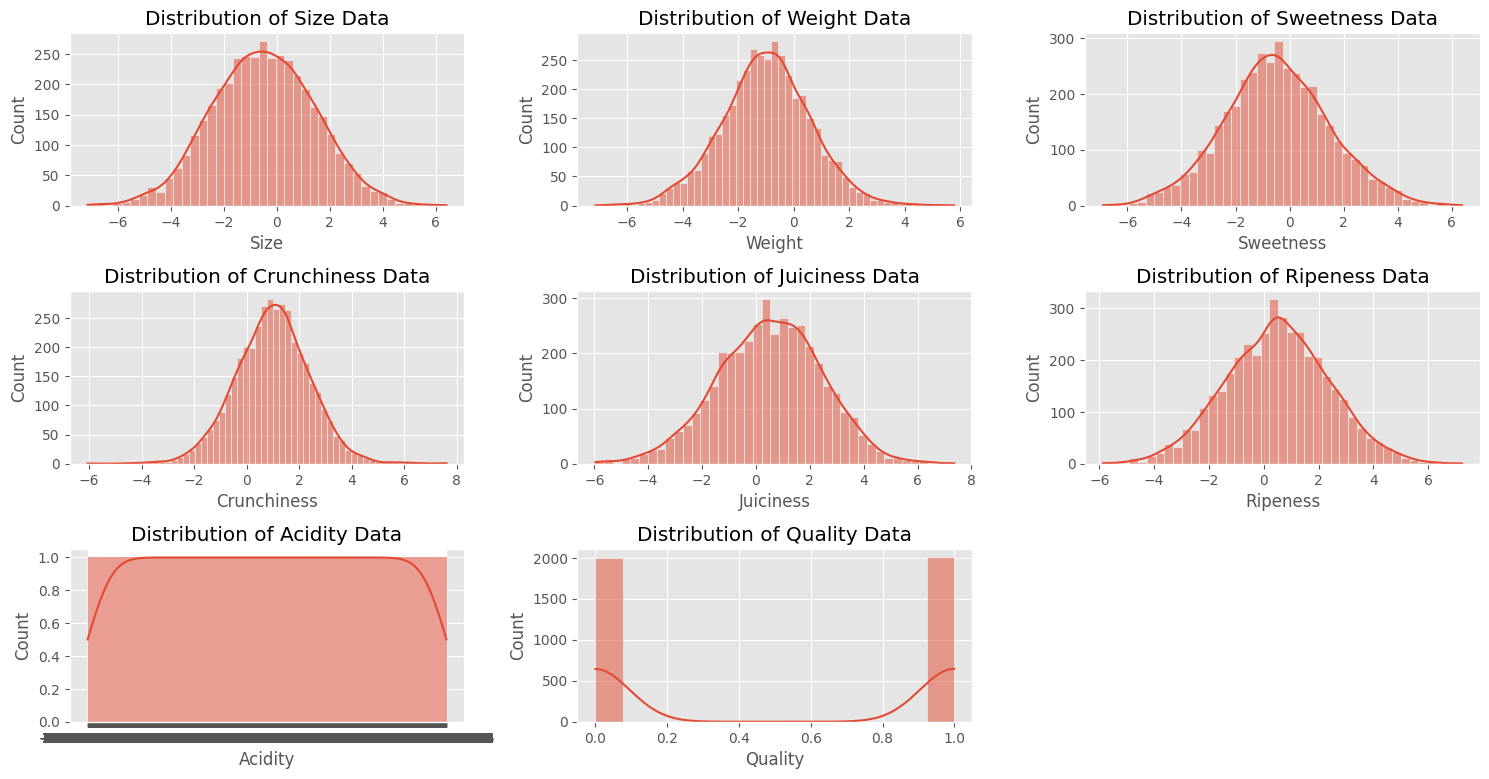

In [15]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

## I checked my data for skewness using charts, and everything looks good - no major imbalances!

# **OUTLIRES** 🍎

## I looked for unusual data points that could mislead my model and decided to remove them to keep things clean for better results.

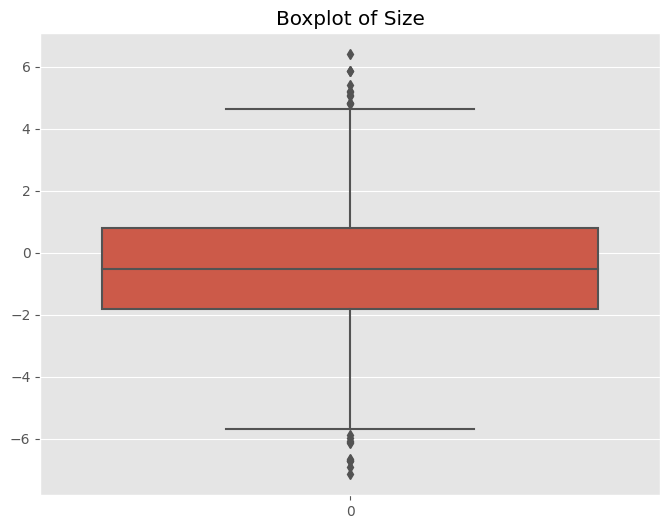

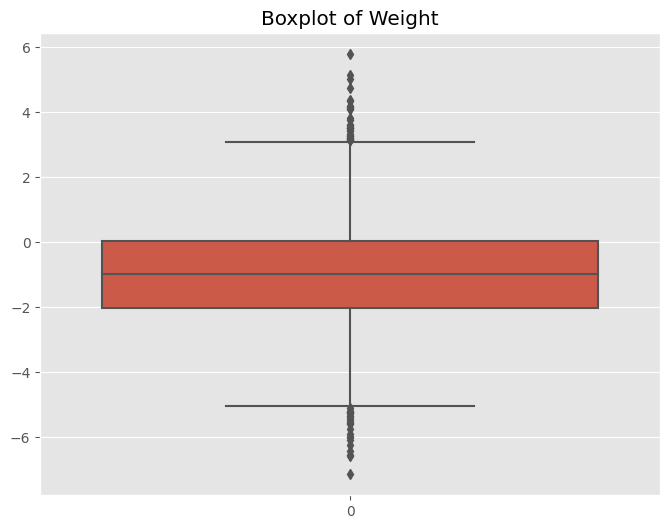

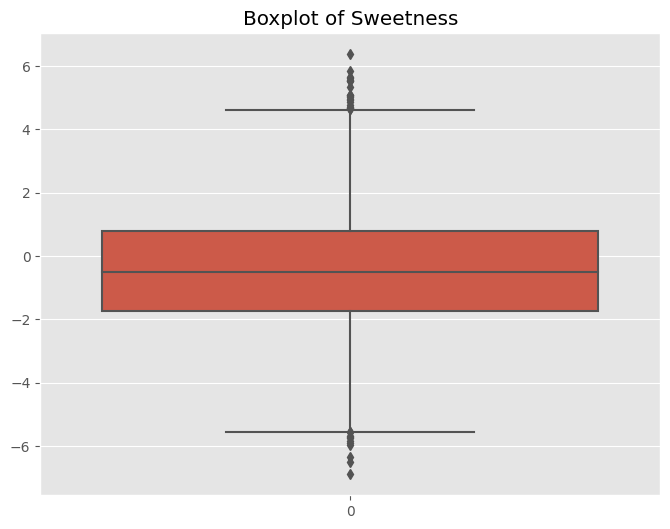

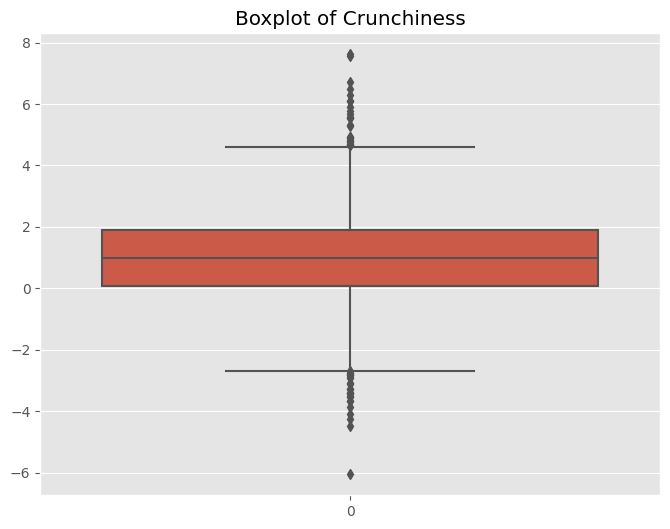

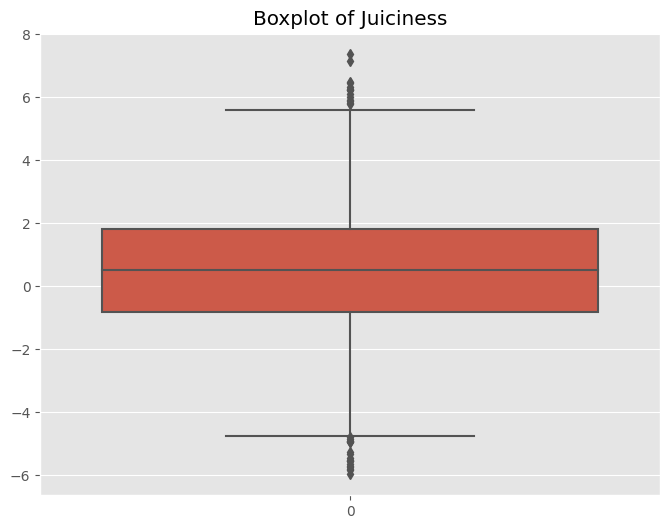

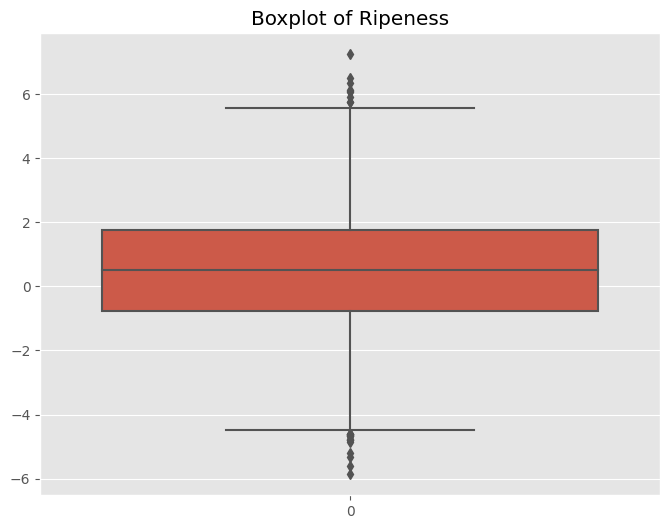

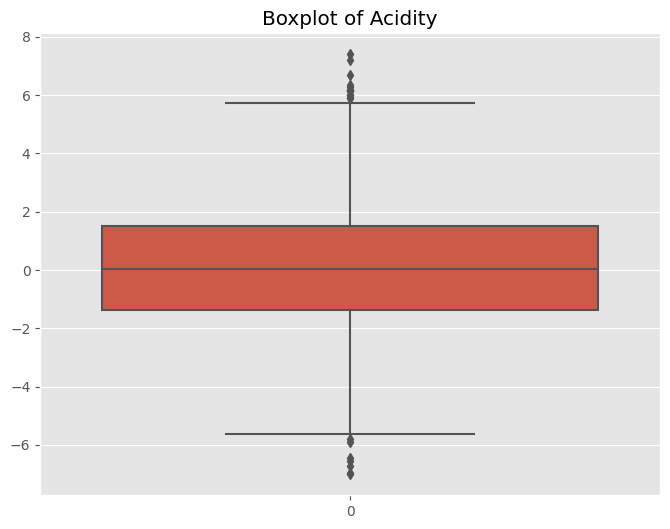

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = df.columns[df.columns != 'Quality']

# Create a boxplot for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


* We can effectively manage outliers in our dataset by utilizing a method called **"replace_outliers_with_bounds."** This method helps identify outliers within the distribution of numeric features associated with apple quality and replaces them with appropriate lower or upper bounds.

* Implementing this approach allows us to eliminate outliers from our data, ensuring its robustness and suitability for subsequent analysis and modeling. By minimizing the potential impact of outliers on our predictive models, we can enhance the reliability and accuracy of our predictions regarding apple quality.

In [17]:
import pandas as pd

def replace_outliers_with_bounds(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    # assign lower_bound to the values below the lower limit and upper_bound to the values above the upper limit.
    column[column < lower_bound] = lower_bound
    column[column > upper_bound] = upper_bound

    return column

# Identify numeric columns except 'Quality'
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Applying the function to numeric columns except the 'Quality' column
df[numeric_columns] = df[numeric_columns].apply(replace_outliers_with_bounds)


In [18]:
df.head(1)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.8449,0.32984,-0.491590483,1


## so I took them out. With a cleaner dataset, the model should perform better!

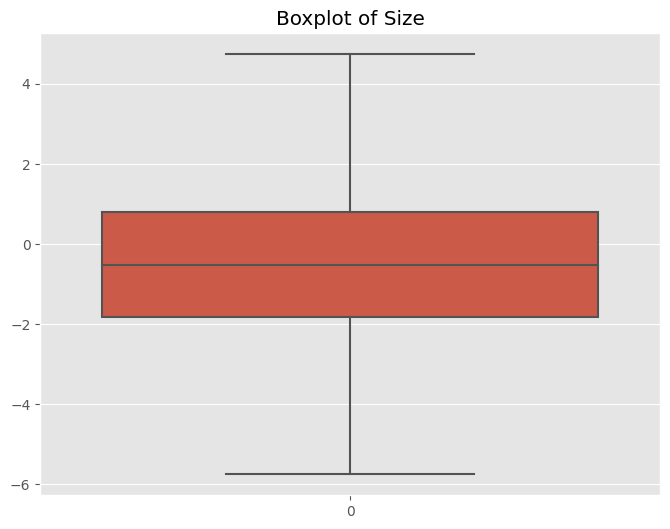

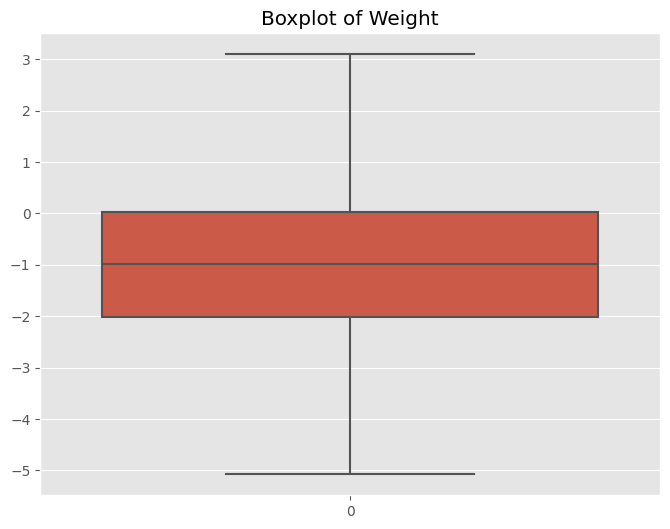

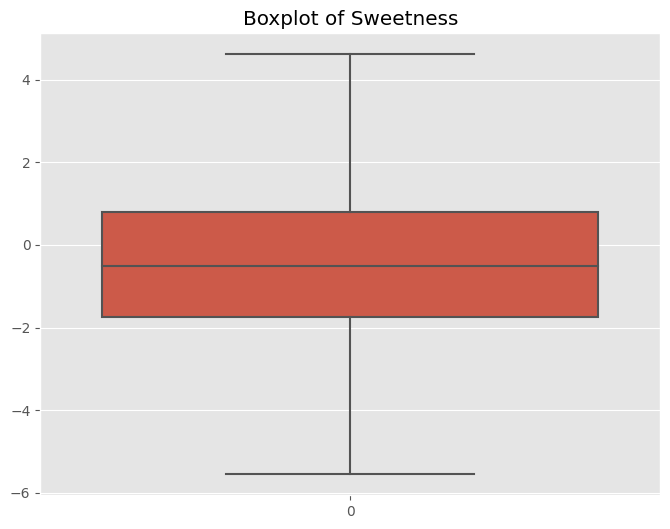

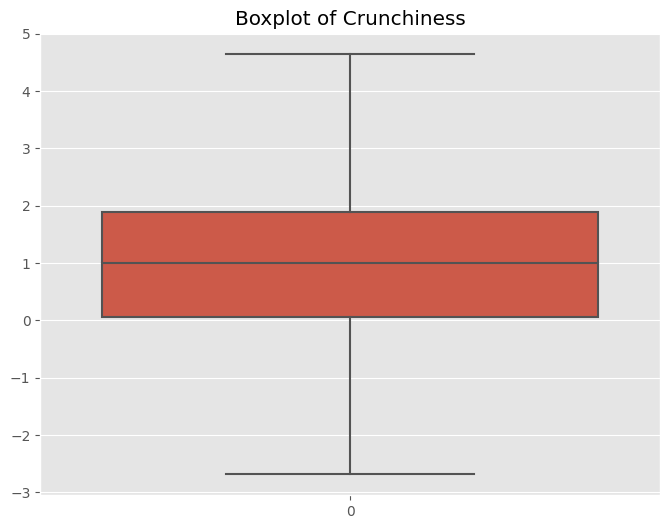

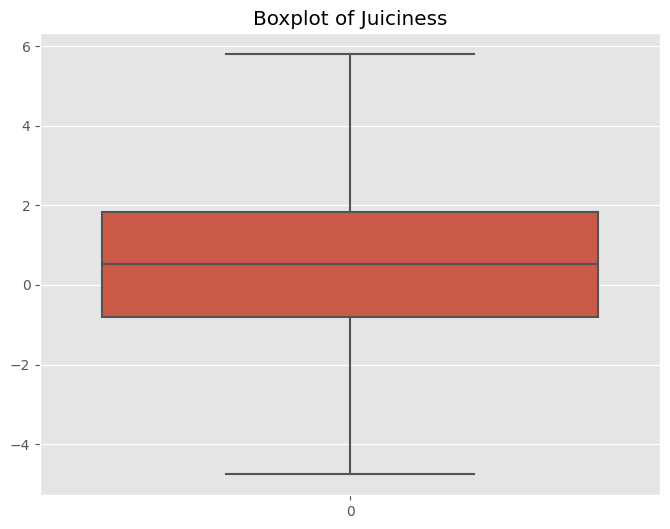

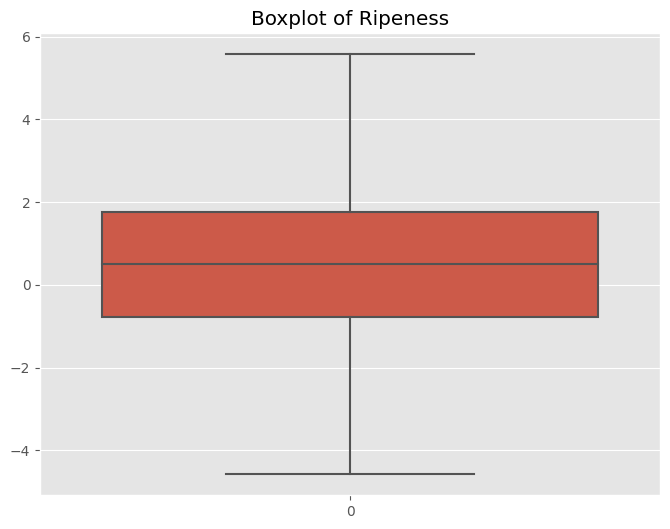

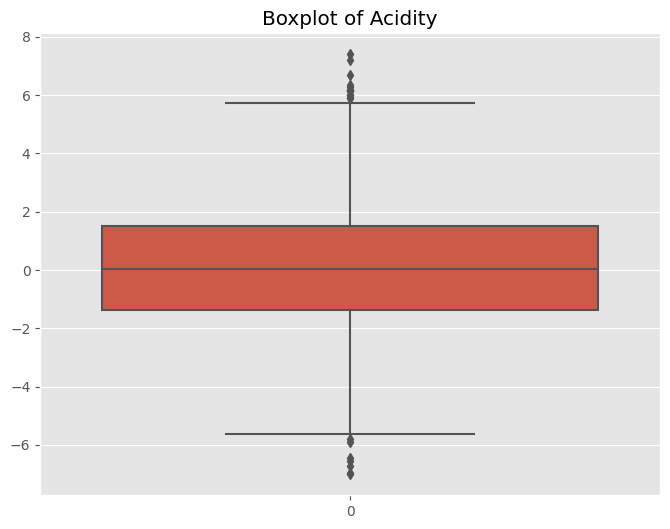

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = df.columns[df.columns != 'Quality']

# Create a boxplot for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# **DATA VISUALIZATION** 🍎 # 

In [20]:
df.head(3)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.844900,0.329840,-0.491590483,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0


<Axes: >

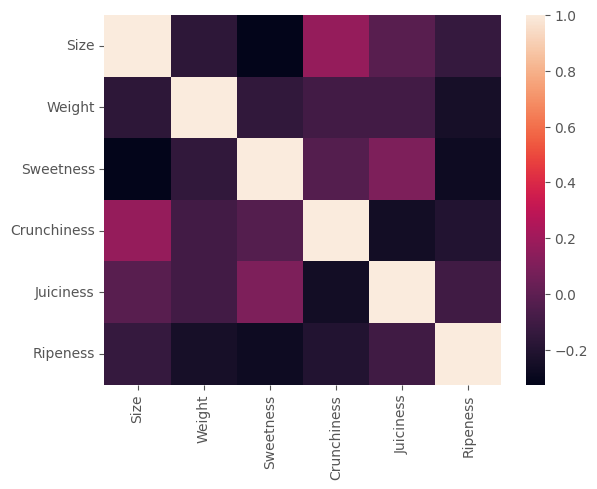

In [21]:
correlation = df.select_dtypes("number").drop(columns="Quality").corr()
sns.heatmap(correlation)

## To understand how the features in my data relate to each other, I created a heatmap. It's like a colorful map where brighter colors indicate stronger relationships between features. Based on the heatmap, I found that juiciness is closely linked to sweetness, which makes sense. Similarly, crunchiness seems to be well-connected to size,

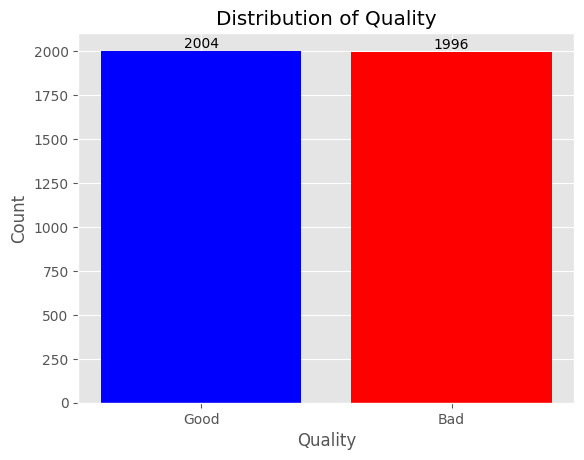

In [22]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'Quality' column
quality_counts = df['Quality'].value_counts()

# Define colors for the bars
colors = ['blue', 'red']

# Plot a bar chart with different colors
plt.bar(quality_counts.index.map({0: 'Bad', 1: 'Good'}), quality_counts.values, color=colors)

# Add labels and title
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Quality')

# Add value labels on top of each bar
for i, count in enumerate(quality_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show plot
plt.show()


## As we can see, there are 2004 good apples and 1996 bad apples in our data.

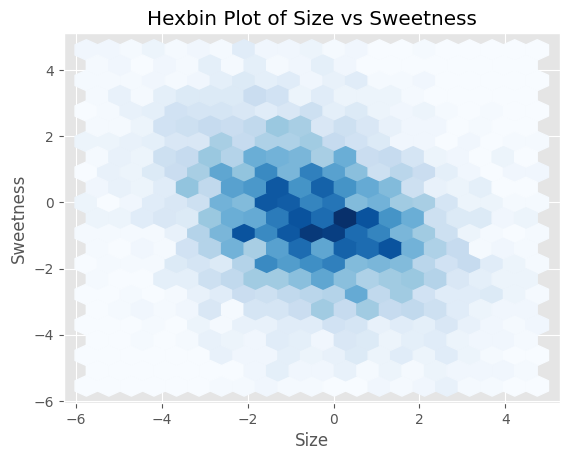

In [23]:
import matplotlib.pyplot as plt

# Create a hexbin plot
plt.hexbin(df['Size'], df['Sweetness'], gridsize=20, cmap='Blues')

# Add labels and title
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.title('Hexbin Plot of Size vs Sweetness')

# Show plot
plt.show()


## Imagine this as a honeycomb, where each hexagon shows how many apples have a specific size and sweetness together. The bigger the hexagon, the more apples fall into that special combination of size and sweetness.

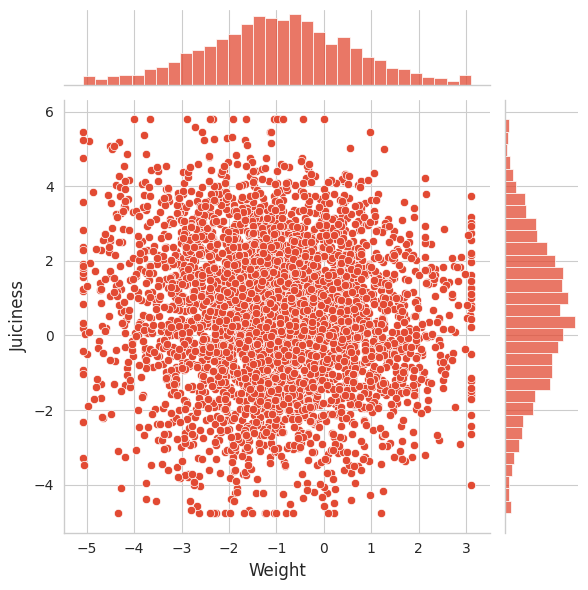

In [24]:
sns.set_style("whitegrid")

# Create a scatter plot
sns.jointplot(x="Weight", y="Juiciness", data=df)

# Show the plot
plt.show()

In [25]:
df.head(1)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,4.612442,-1.012009,1.8449,0.32984,-0.491590483,1


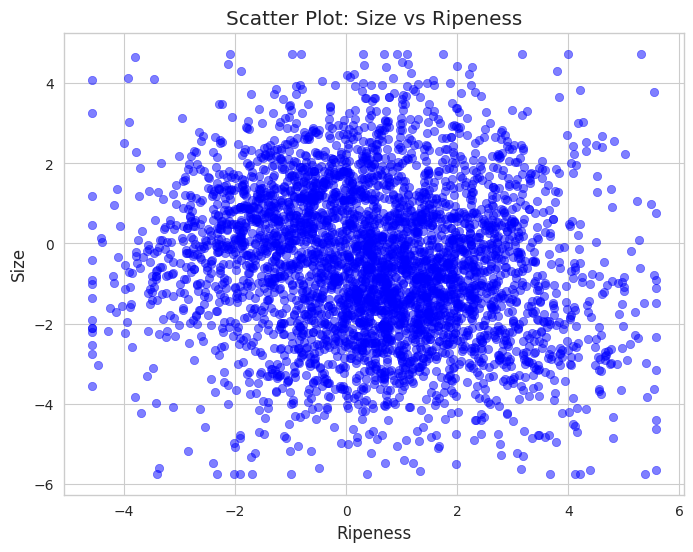

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Ripeness'], df['Size'], color='blue', alpha=0.5)

# Customize labels and title
plt.xlabel('Ripeness')
plt.ylabel('Size')
plt.title('Scatter Plot: Size vs Ripeness')

# Show plot
plt.grid(True)
plt.show()

## in this plt we can see that the apples of medium size and medium ripeness are the most common in this dataset.

In [27]:
# For Sweetness vs Crunchiness plot
fig = px.scatter(df, x="Sweetness", y="Crunchiness", color="Quality", title='Sweetness x Crunchiness')

fig.update_layout(template='plotly_white')  # Set background to white

# For Weight vs Size plot
fig1 = px.scatter(df, x="Weight", y="Size", color="Quality", title='Weight x Size')

fig1.update_layout(template='plotly_white')  # Set background to white

# Show plots
fig.show()
fig1.show()

## This plot uses colors to represent the quality of the apples. Yellow apples represent good apples, while blue apples represent bad apples.

# **Training our Machine Learning Model 🍎** 

## Now that I've explored and cleaned the data, it's time to train the machine learning model! This model will learn from the data and be able to predict the quality of new apples based on their features, like size, sweetness, and ripeness.

In [28]:
X = df.drop('Quality', axis = 1)
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.12, random_state = 0)


## * I prepared the data for training by separating it into two parts: inputs and outputs. The inputs (stored in X). The output (stored in y) is what we want to predict, which is the apple quality ("good" or "bad").
## * Next, I split this data into training and testing sets. The training set (around 88%) will be used to train the model, and the testing set (around 12%) will be used to evaluate its performance on unseen data later.

In [29]:
X_train.shape

(3520, 7)

In [30]:
 X_test.shape

(480, 7)

In [31]:
df['Quality'].shape 

(4000,)

In [32]:
baseline_acc = df["Quality"].value_counts(normalize=True).max()
print("Baseline accuracy: ", baseline_acc)

Baseline accuracy:  0.501


## * The baseline accuracy, 0.501, is the performance achieved by a naive model that always predicts the most frequent class. Models with accuracy above this baseline are considered effective learners.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    
    if clf_name == 'KNN':
        # Perform feature scaling for KNN
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Hyperparameter tuning for KNN
        param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
        grid_search = GridSearchCV(clf, param_grid, cv=5)
        grid_search.fit(X_train_scaled, y_train)
        
        # Get the best parameters for KNN
        best_params = grid_search.best_params_
        
        # Train KNN with the best parameters
        best_knn = KNeighborsClassifier(**best_params)
        best_knn.fit(X_train_scaled, y_train)
        
        # Make predictions with KNN
        y_pred = best_knn.predict(X_test_scaled)
    else:
        # Train other classifiers without scaling and hyperparameter tuning
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {clf_name}: {accuracy:.4f}")
    print()


Training Logistic Regression...
Accuracy for Logistic Regression: 0.7708

Training Decision Tree...
Accuracy for Decision Tree: 0.8063

Training Random Forest...
Accuracy for Random Forest: 0.8917

Training SVM...
Accuracy for SVM: 0.9021

Training KNN...
Accuracy for KNN: 0.9125



## * I wanted to find the best model for predicting apple quality, so I compared several different machine learning models in one go. I tried Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).

## * Looking at the results, we can see that the K-Nearest Neighbors (KNN) model achieved the highest accuracy of 91.25% in predicting apple quality. This means that for every 100 unseen apples, the KNN model was able to correctly predict the quality (good or bad) for 91 of them.

## The other models also performed well, with accuracy scores ranging from 77.08% for Logistic Regression to 90.21% for Support Vector Machine (SVM).

# * in the end Thank you for watching my presentation on analyzing apple quality with machine learning. I hope you found it informative.

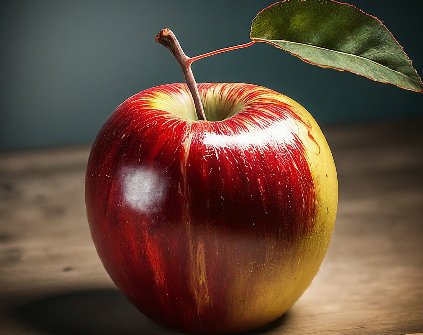

### After evaluating various machine learning classifiers for our project on apple quality prediction, we obtained the following accuracies:

* **Logistic Regression: 0.7708**
* **Decision Tree: 0.8167**
* **Random Forest: 0.8854**
* **SVM: 0.9021**
* **KNN: 0.9125**

##### Among these classifiers, **the K-Nearest Neighbors (KNN) algorithm** yielded the highest accuracy of **0.9125**. This means that KNN performed the best in predicting apple quality based on the features we provided. It's important to note that achieving high accuracy with KNN involved scaling the features and tuning hyperparameters, which led to superior performance compared to other classifiers in our study. Overall, these results provide valuable insights into our project on assessing apple quality using machine learning techniques. #####

### Your support through **upvotes** is greatly appreciated! 🍎😊


In [ ]:
git init